In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats

In [ ]:
# Mount Google Drive (this will prompt for authorization)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the data
file_path = '/content/drive/MyDrive/LR/salary_data.csv'  # Adjust the path to where you've stored your file
salary_data = pd.read_csv(file_path)


In [ ]:

# Prepare data for linear regression
X = salary_data[['YearsExperience']]
y = salary_data['Salary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting using the model
y_pred = model.predict(X_test)

# Statistics and summary with statsmodels
X_train_sm = sm.add_constant(X_train)  # Adding a constant for statsmodels
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

# Predict values along the entire range for confidence intervals
X_full = pd.DataFrame({'YearsExperience': np.linspace(X['YearsExperience'].min(), X['YearsExperience'].max(), 100)})
X_full_sm = sm.add_constant(X_full)  # add constant as statsmodels does not include it by default
predictions = model_sm.get_prediction(X_full_sm)
predictions_summary_frame = predictions.summary_frame()

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     598.4
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           1.91e-17
Time:                        21:58:32   Log-Likelihood:                -239.44
No. Observations:                  24   AIC:                             482.9
Df Residuals:                      22   BIC:                             485.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.532e+04   2285.938     

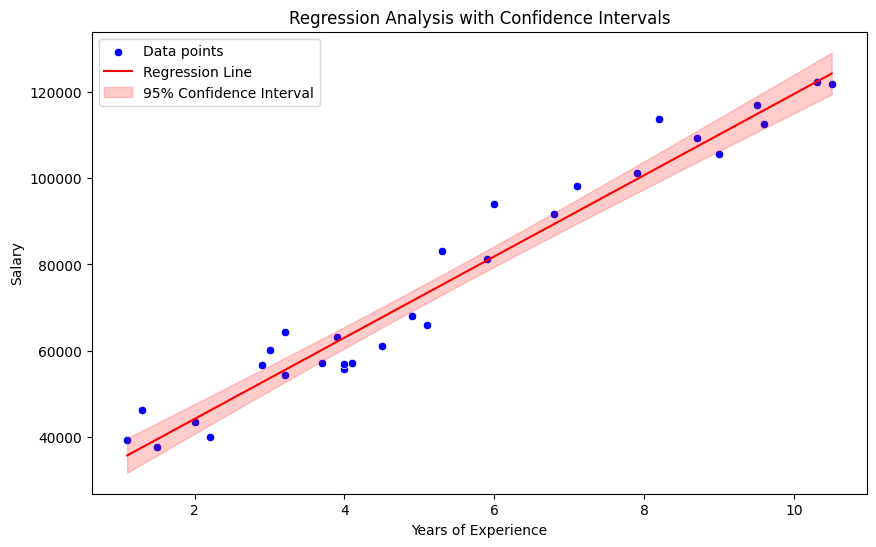

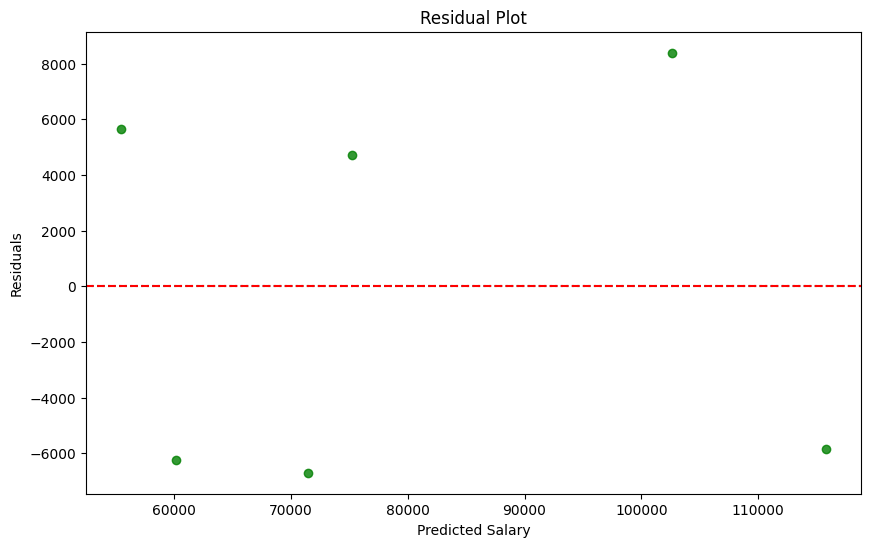

In [ ]:

# Visualization of regression results and confidence intervals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsExperience', y='Salary', data=salary_data, color='blue', label='Data points')
plt.plot(X_full['YearsExperience'], predictions_summary_frame['mean'], color='red', label='Regression Line')
plt.fill_between(X_full['YearsExperience'], predictions_summary_frame['mean_ci_lower'], predictions_summary_frame['mean_ci_upper'], color='red', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Regression Analysis with Confidence Intervals')
plt.legend()
plt.show()

# Residual plot to check for homoscedasticity
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, color='green')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()




In [ ]:
# Conducting a Shapiro-Wilk test for normality of residuals
shapiro_test = stats.shapiro(model_sm.resid)
print(f'Shapiro-Wilk test results — Statistic: {shapiro_test.statistic}, p-Value: {shapiro_test.pvalue}')

Shapiro-Wilk test results — Statistic: 0.9533714056015015, p-Value: 0.3200313150882721
